# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

The chromedriver version (129.0.6668.70) detected in PATH at /usr/local/bin/chromedriver might not be compatible with the detected chrome version (130.0.6723.70); currently, chromedriver 130.0.6723.69 is recommended for chrome 130.*, so it is advised to delete the driver in PATH and retry


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [6]:
# Extract all rows of data
table_data = soup.find_all("tr", class_="data-row")
table_data

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
data_list = []

# Loop through the scraped data to create a list of rows
for row in table_data:
    data = row.find_all("td")
    values = [value.text for value in data]
    data_list.append(values)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data_list, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [9]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
mars_weather_df['terrestrial_date']= pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype('int32')
mars_weather_df['ls'] = mars_weather_df['ls'].astype('int32')
mars_weather_df['month'] = mars_weather_df['month'].astype('int32')
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
months = mars_weather_df['month'].max()
months

12

In [17]:
# 2. How many sols (Martian days) worth of data are there?
Martian_days = mars_weather_df['sol'].count()
Martian_days

1867

In [19]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_weather_df.groupby("month")["min_temp"].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

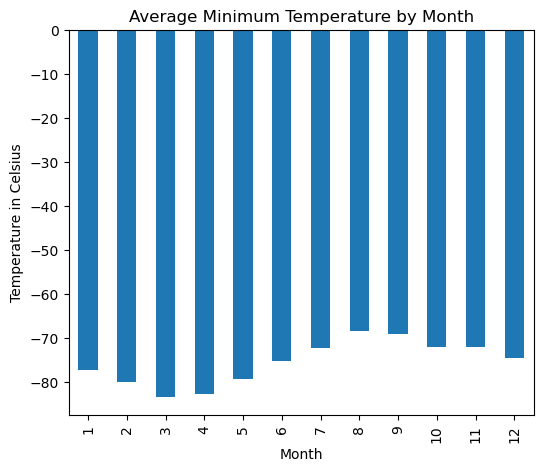

In [24]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind="bar", figsize=(6,5))

plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')

plt.show()

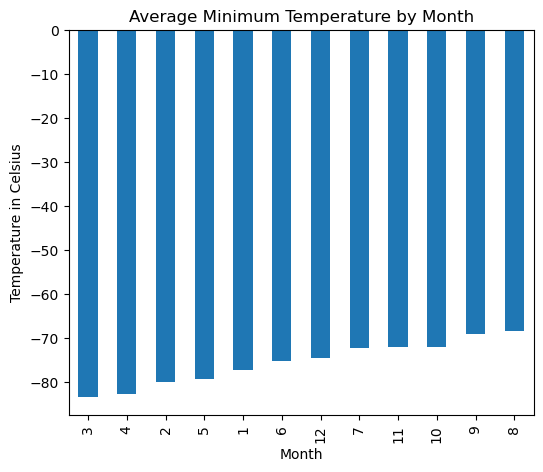

In [25]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_sorted = avg_min_temp.sort_values()
avg_min_temp_sorted.plot(kind="bar", figsize=(6,5))

plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')

plt.show()

In [28]:
# 4. What is the average pressure by month?
avg_pressure = mars_weather_df.groupby("month")["pressure"].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

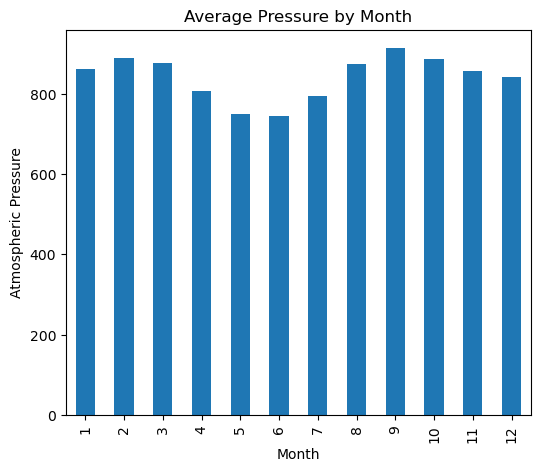

In [29]:
# Plot the average pressure by month
avg_pressure.plot(kind="bar", figsize=(6,5))

plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title('Average Pressure by Month')

plt.show()

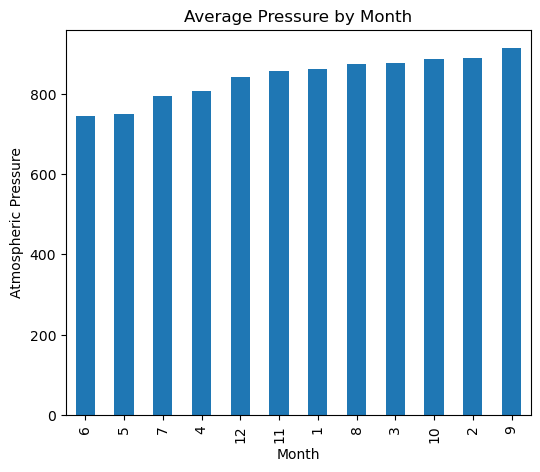

In [30]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure = avg_pressure.sort_values()
avg_pressure.plot(kind="bar", figsize=(6,5))

plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title('Average Pressure by Month')

plt.show()

In [32]:
days_of_earth = mars_weather_df['min_temp']
days_of_earth

0      -75.0
1      -76.0
2      -76.0
3      -74.0
4      -74.0
        ... 
1862   -78.0
1863   -77.0
1864   -76.0
1865   -77.0
1866   -77.0
Name: min_temp, Length: 1867, dtype: float64

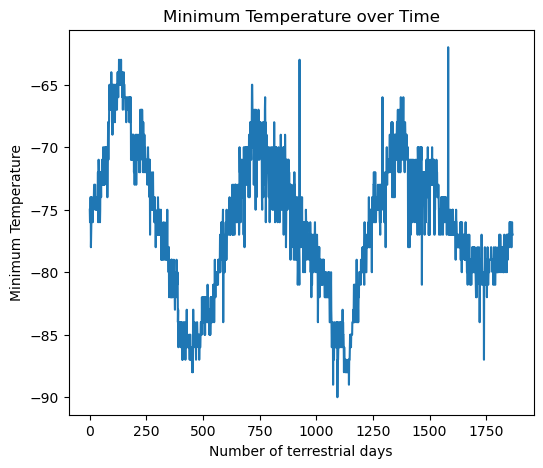

In [33]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
days_of_earth = mars_weather_df['min_temp']
days_of_earth.plot(kind="line", figsize=(6,5))

plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum Temperature")
plt.title('Minimum Temperature over Time')

plt.show()

#### Minimum Temperature
month 3 and 4 are the months with the lowest temperature on the planet Mars. Mars has seasons like Earth and has temperature swings going from the highest on month 8 and 9 and lowest on month 3 and 4.


#### Atmospheric Pressure
Highest months of pressure on Mars are on the same months as when the highest and lowest temperatures occur on Mars. This makes sense in terms of the months with the highest months in temperature as the higher the temperature the higher the pressure. It is confusing to me why the coldest months also have the highest pressure on Mars. This would be an interesting thing to do a deeper reearch dive in to understand.


#### Year Length
given the 1867 days on mars and the fact that terrestrial date started on 2012-8-16 and ended in 2018-2-27 there were about 5.5 years for one Martian year. 


In [37]:
earth_days = mars_weather_df['terrestrial_date'].count()
earth_days

1867

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [35]:
# Write the data to a CSV
output_path = "mars_weather_data.csv"
mars_weather_df.to_csv(output_path, index=False, header=True)

In [36]:
browser.quit()